In [25]:
import numpy
import random
import timeit
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
from math import inf
import time, functools
import decimal

In [3]:
def constant(vector,value): 
    return 0

In [4]:
def sumOfVector(vector, value):
    return sum(vector)

In [5]:
def productOfVector(vector, value):
    return numpy.prod(vector)

In [36]:
def calculatePolinom(vector, value):
    result = decimal.Decimal(0)
    power = 0
    for item in vector:
        result += item*(decimal.Decimal(value)**decimal.Decimal(power))
        power += 1
    return result

In [7]:
def horners(vector,value):
    v = list(vector)
    v.reverse()
    def hRec(v, value):
        if (len(v)==1):
            return v.pop()
        else:
            return v.pop() + value*hRec(v,value)
    
    return hRec(v,value)

In [8]:
def bubbleSort(vector,value):
    array = list(vector)
    size = len(array)
    for i in range(size-1):
        for j in range(size-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

In [9]:
def quickSort(vector, value):
    array = list(vector)
    if len(array) <= 1:
        return array
    else:
        q = random.choice(array)
        s_nums = []
        m_nums = []
        e_nums = []
        for n in array:
            if n < q:
                s_nums.append(n)
            elif n > q:
                m_nums.append(n)
            else:
                e_nums.append(n)
        return quickSort(s_nums, value) + e_nums + quickSort(m_nums, value)

In [10]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = round((start + end)/ 2)
    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end)
    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1)
    else:
        return mid

def insertion_sort(the_array):
    l = len(the_array)
    for index in range(1, l):
        value = the_array[index]
        pos = binary_search(the_array, value, 0, index - 1)
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    return the_array

def merge(left, right):
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

def timSort(vector,value):
    array = list(vector)
    runs, sorted_runs = [], []
    l = len(array)
    new_run = [array[0]]
    for i in range(1, l):
        if i == l-1:
            new_run.append(array[i])
            runs.append(new_run)
            break
        if array[i] < array[i-1]:
            if not new_run:
                runs.append([array[i-1]])
                new_run.append(array[i])
            else:
                runs.append(new_run)
                new_run = []
        else:
            new_run.append(array[i])
    for each in runs:
        sorted_runs.append(insertion_sort(each))
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)
    return sorted_array

In [43]:
def decorator(f, vector, value):
    t = timeit.timeit('{}'.format(f(vector,value)),number=1, globals=globals())
    return t*1000000

In [19]:
def runFunctions(n, value, run):
    dict = {}
    functions = [constant,sumOfVector,productOfVector,calculatePolinom,horners,bubbleSort,quickSort,timSort]
    for i in tqdm(range(1,n)):
        tmp = {}
        
        for j in range(run):
            vector = list(numpy.random.randint(100, size=i))
            for func in functions:
                t = decorator(func,vector,value)
                name = func.__name__
                if name in tmp:
                    tmp[func.__name__].append(t)
                else:
                    tmp[func.__name__] = [t]
                
        for name in tmp:
            if name in dict:
                dict[name].append(sum(tmp[name])/len(tmp[name]))
            else:
                dict[name] = [sum(tmp[name])/len(tmp[name])]
    return dict

In [13]:
def drawPlots(data, n):
    n = len(data["constant"])+1
    x = [item for item in range(1,n)]
    num=0
    for item in data:
        num+=1
        MAX=max(data[item])
        plt.style.use('seaborn-darkgrid')
        fig = plt.figure(figsize=(10,10))
        plt.plot(x, data[item],color='black',linewidth=0.4, alpha=0.9, label=item)
        plt.xlabel('n',fontsize=18)
        plt.ylabel('time (in sec *10^-6)',fontsize=18)
        plt.xlim(1,n)
        plt.ylim(0,MAX)
        plt.savefig("pictures/"+item+".png")
        plt.close(fig)

In [14]:
def writeCSV(data):
    with open('data.csv', 'w') as f:
        writer = csv.writer(f)
        for key, value in data.items():
            writer.writerow([key, value])

In [15]:
def readCSV():
    data = {}
    with open('data.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            k, v = row
            data[k] = [float(item) for item in v.replace(" ","").split(",")[1:-1]]
    return data

In [104]:
def multiplyMatrix(n):
    t_ser = []
    for i in tqdm(range(1,n)):
        A = numpy.random.rand(i,i)
        B = numpy.random.rand(i,i)
        tim = timeit.Timer(functools.partial(numpy.dot,A,B))
        t_ser.append(tim.timeit(1))
        
    return t_ser

 87%|████████▋ | 1738/2000 [1:33:49<51:40, 11.83s/it]  <ipython-input-7-4d124a8c9427>:8: RuntimeWarning: overflow encountered in double_scalars
  return v.pop() + value*hRec(v,value)
100%|██████████| 2000/2000 [2:43:17<00:00,  4.90s/it]


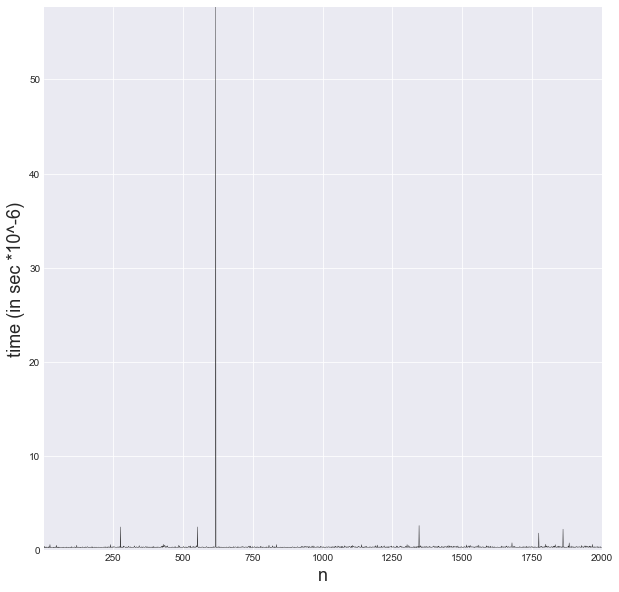

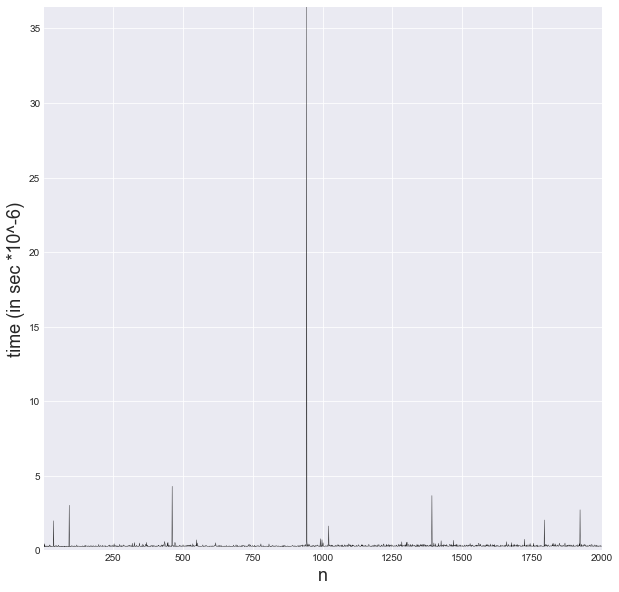

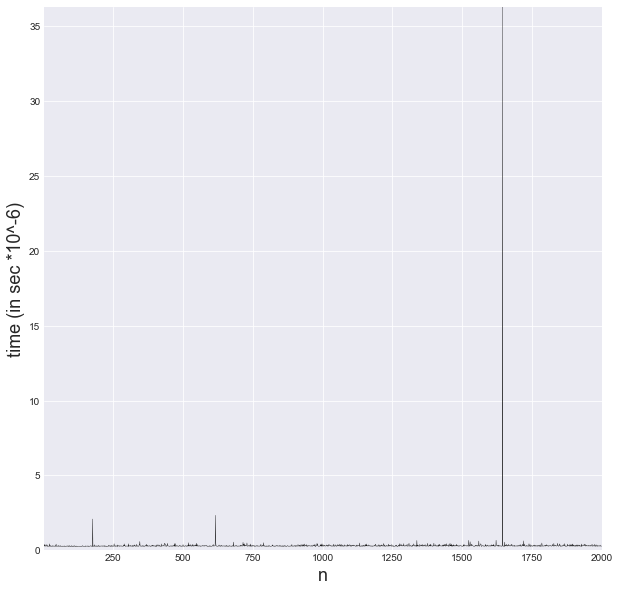

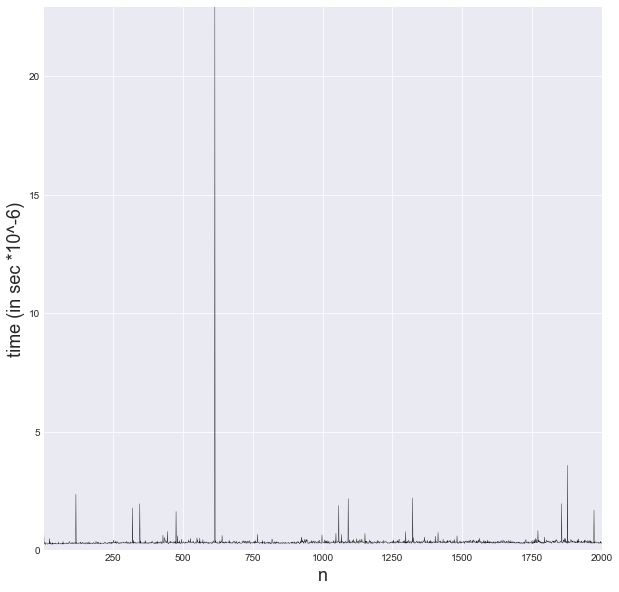

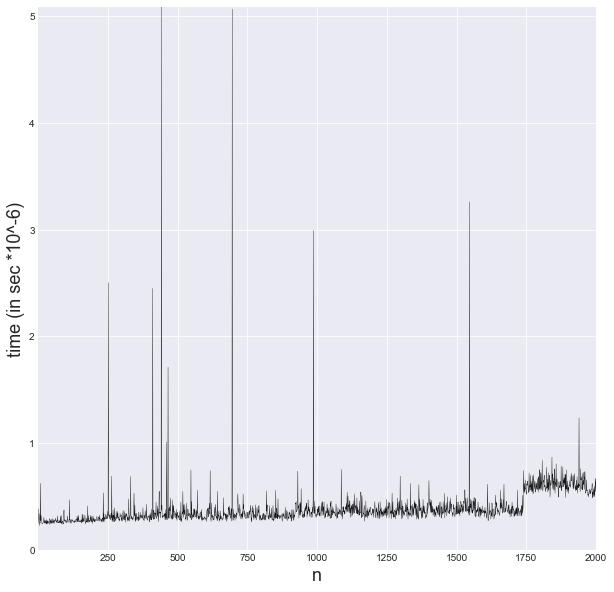

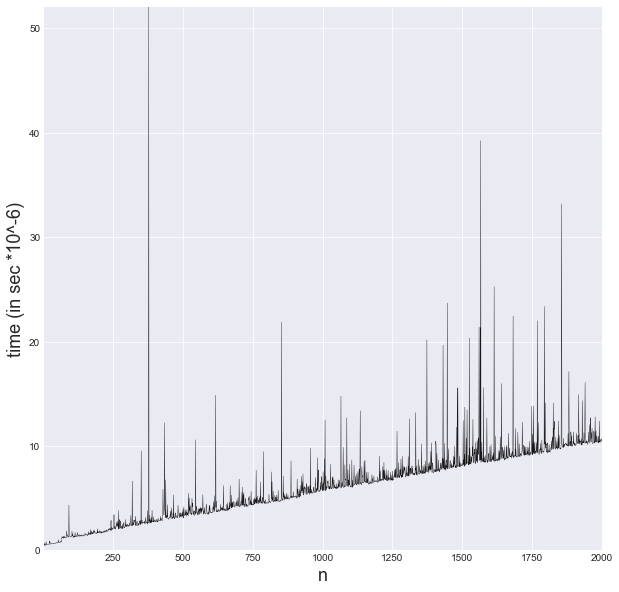

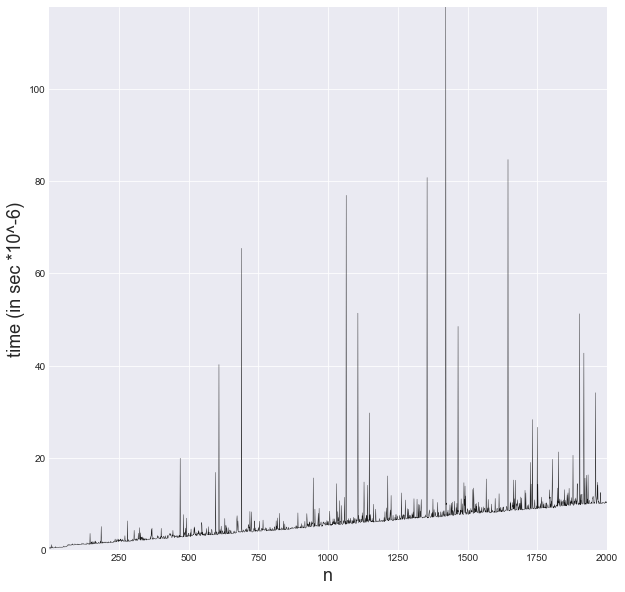

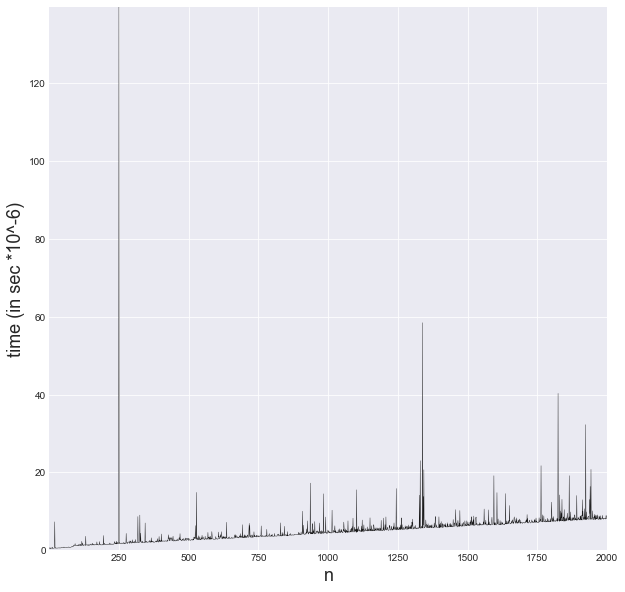

In [44]:
number = 2001
val = 1.5
run = 5
data = runFunctions(number, val, run)
writeCSV(data)
#data=readCSV()
drawPlots(data, number)

In [105]:
n=2001
data = multiplyMatrix(n)

100%|██████████| 2000/2000 [03:07<00:00, 10.65it/s] 


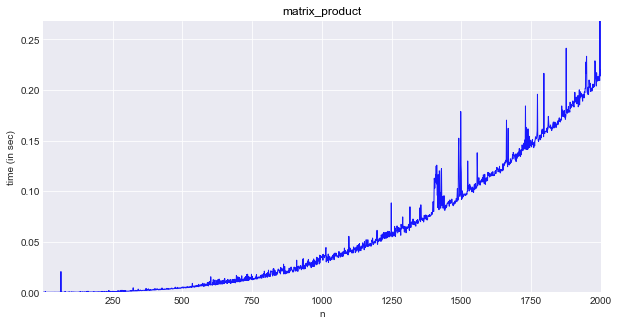

In [106]:
x = [item for item in range(1,n)]
MAX=max(data)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.plot(x, data,color='black',linewidth=1, alpha=0.9, label="matrix_product")
plt.xlabel('n')
plt.ylabel('time (in sec)')
plt.title("matrix_product", fontsize=12, fontweight=0, color='black')
plt.xlim(1,n)
plt.ylim(0,MAX)
plt.savefig("pictures/matrix.png")